In [10]:
!pip install opencv-python-headless numpy matplotlib scipy

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [2]:
image = cv2.imread('sample.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

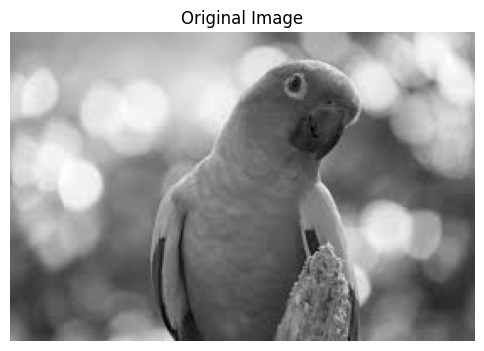

In [3]:
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

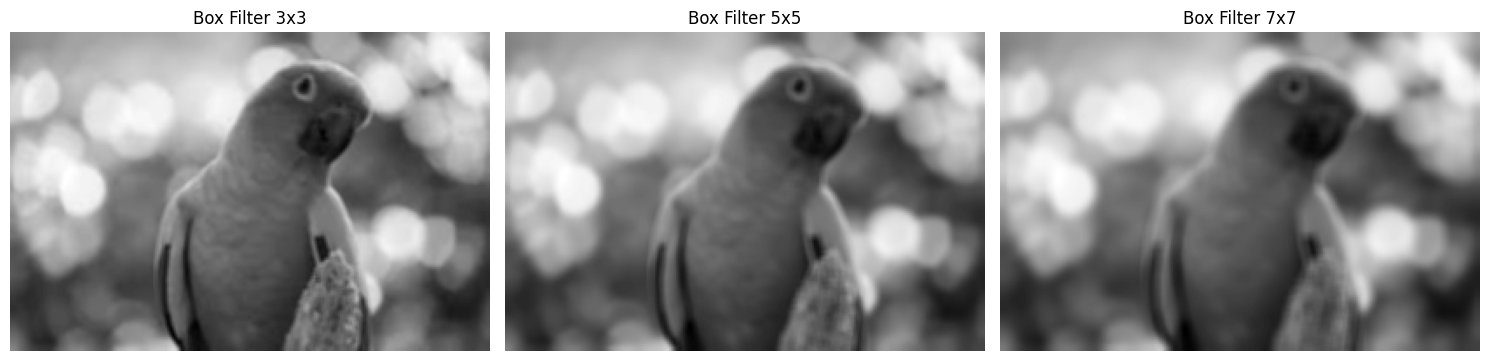

In [4]:
kernel_sizes = [3, 5, 7]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, k in enumerate(kernel_sizes):
    kernel = np.ones((k, k), np.float32) / (k * k)
    filtered_image = cv2.filter2D(image, -1, kernel)
    axes[i].imshow(filtered_image, cmap='gray')
    axes[i].set_title(f'Box Filter {k}x{k}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

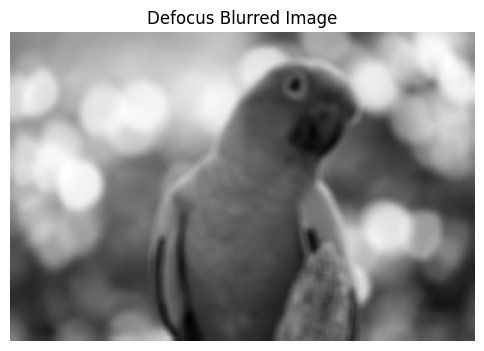

In [5]:
defocus_kernel = np.ones((5, 5), np.float32) / 25
blurred_image = cv2.filter2D(image, -1, defocus_kernel)

plt.figure(figsize=(6,6))
plt.imshow(blurred_image, cmap='gray')
plt.title('Defocus Blurred Image')
plt.axis('off')
plt.show()

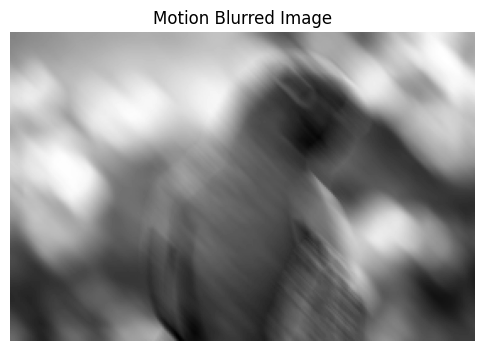

In [6]:
motion_blur_kernel = np.zeros((15, 15))
n = motion_blur_kernel.shape[0]
np.fill_diagonal(motion_blur_kernel, 1)
motion_blur_kernel /= n
motion_blurred_image = cv2.filter2D(image, -1, motion_blur_kernel)

plt.figure(figsize=(6,6))
plt.imshow(motion_blurred_image, cmap='gray')
plt.title('Motion Blurred Image')
plt.axis('off')
plt.show()

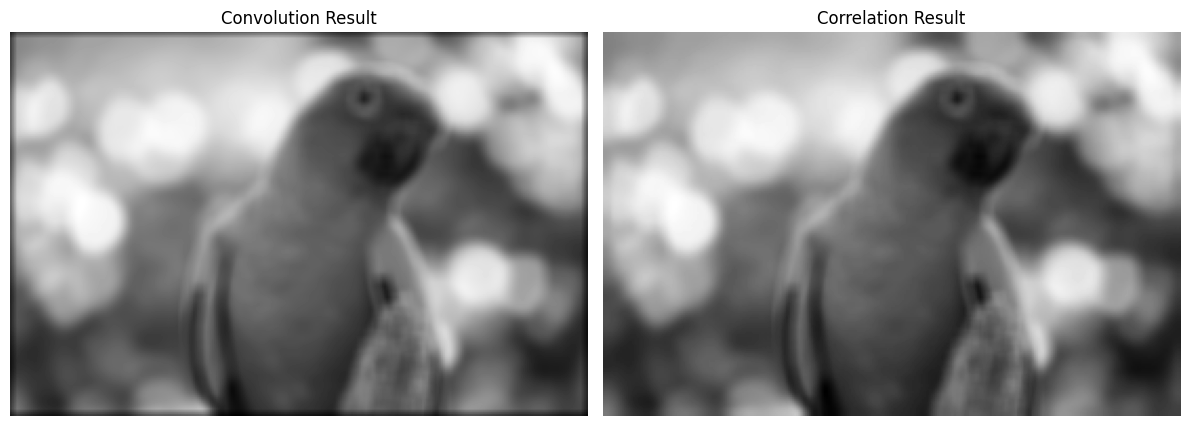

In [7]:
conv_result = convolve2d(image, kernel, mode='same')
corr_result = cv2.filter2D(image, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(conv_result, cmap='gray')
axes[0].set_title('Convolution Result')
axes[0].axis('off')
axes[1].imshow(corr_result, cmap='gray')
axes[1].set_title('Correlation Result')
axes[1].axis('off')

plt.tight_layout()
plt.show()

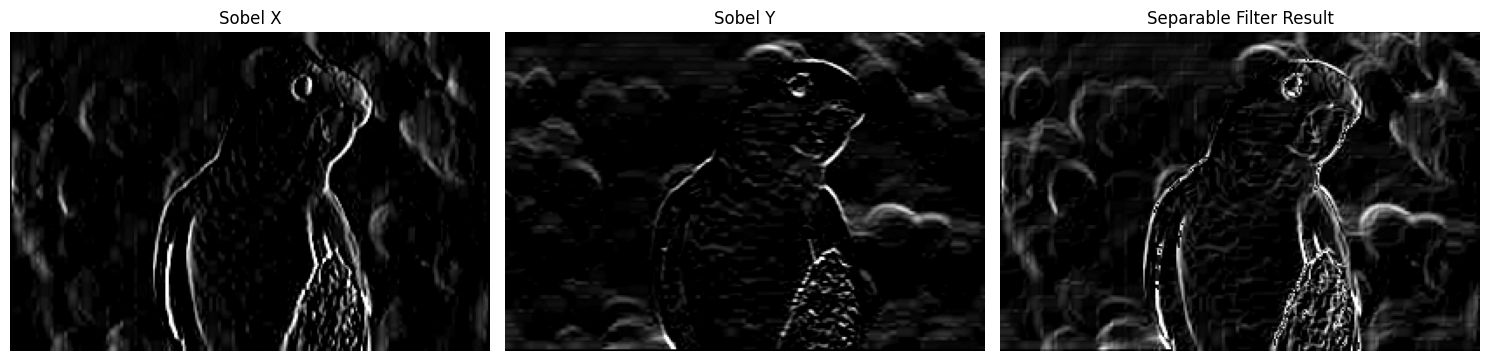

In [8]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

edge_x = cv2.filter2D(image, -1, sobel_x)
edge_y = cv2.filter2D(image, -1, sobel_y)
separable_filter_result = edge_x + edge_y

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(edge_x, cmap='gray')
axes[0].set_title('Sobel X')
axes[0].axis('off')
axes[1].imshow(edge_y, cmap='gray')
axes[1].set_title('Sobel Y')
axes[1].axis('off')
axes[2].imshow(separable_filter_result, cmap='gray')
axes[2].set_title('Separable Filter Result')
axes[2].axis('off')

plt.tight_layout()
plt.show()

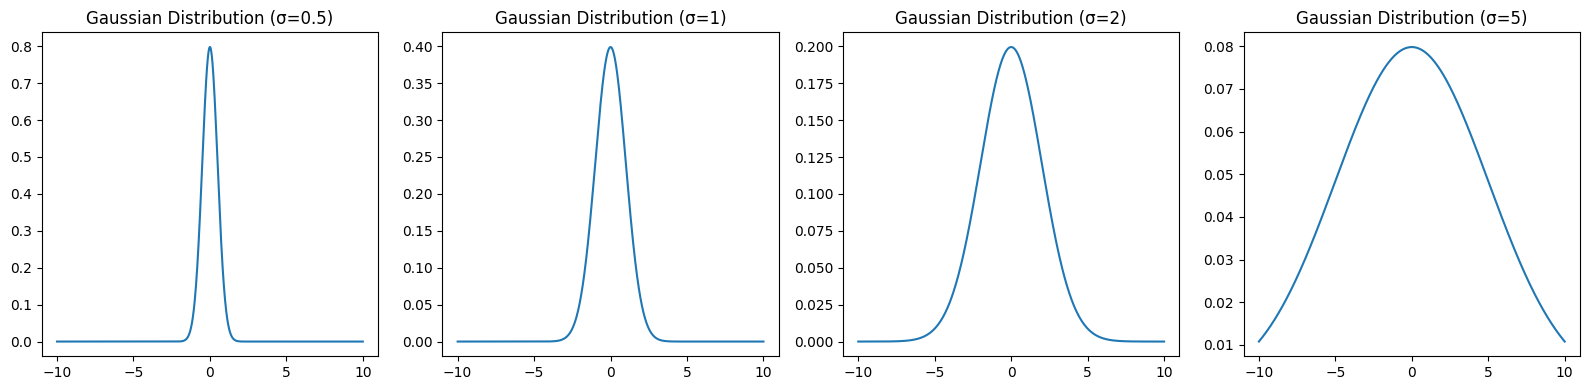

In [9]:
sigma_values = [0.5, 1, 2, 5]
x = np.linspace(-10, 10, 1000)
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, sigma in enumerate(sigma_values):
    gauss_curve = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(- (x ** 2) / (2 * sigma ** 2))
    axes[i].plot(x, gauss_curve)
    axes[i].set_title(f'Gaussian Distribution (σ={sigma})')

plt.tight_layout()
plt.show()